In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle

## Загрузка и знакомство с данными

In [5]:
df = pd.read_csv('../data/CarData.csv')
display(df.head(10))

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [6]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
df['Car_Name'] = df['Car_Name'].astype('category')
df['Fuel_Type'] = df['Fuel_Type'].astype('category')
df['Selling_type'] = df['Selling_type'].astype('category')
df['Transmission'] = df['Transmission'].astype('category')

df['Year'] = df['Year'].astype('int16')
df['Selling_Price'] = df['Selling_Price'].astype('float16')
df['Present_Price'] = df['Present_Price'].astype('float16')
df['Driven_kms'] = df['Driven_kms'].astype('int32')
df['Owner'] = df['Owner'].astype('int8')

In [9]:
cat_features = df.select_dtypes(include=['category']).columns.to_list()
cat_features

['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission']

In [10]:
for cat in cat_features:
    print(f'{cat} - numer of unique = {df[cat].nunique()}')

Car_Name - numer of unique = 98
Fuel_Type - numer of unique = 3
Selling_type - numer of unique = 2
Transmission - numer of unique = 2


In [11]:
num_features = df.select_dtypes(include=['number']).columns.to_list()
num_features

['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']

In [12]:
for col in cat_features:
    print(f'Unique categories in {col}: {df[col].value_counts()}')

Unique categories in Car_Name: Car_Name
city                      26
corolla altis             16
verna                     14
fortuner                  11
brio                      10
                          ..
Hero Passion X pro         1
Hero Hunk                  1
camry                      1
Hero Honda Passion Pro     1
800                        1
Name: count, Length: 98, dtype: int64
Unique categories in Fuel_Type: Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Unique categories in Selling_type: Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64
Unique categories in Transmission: Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


## Очистка данных

Данные очищать не нужно, df.describe() показал, что данные выглядят правдоподобно

## Анализ признаков для модели

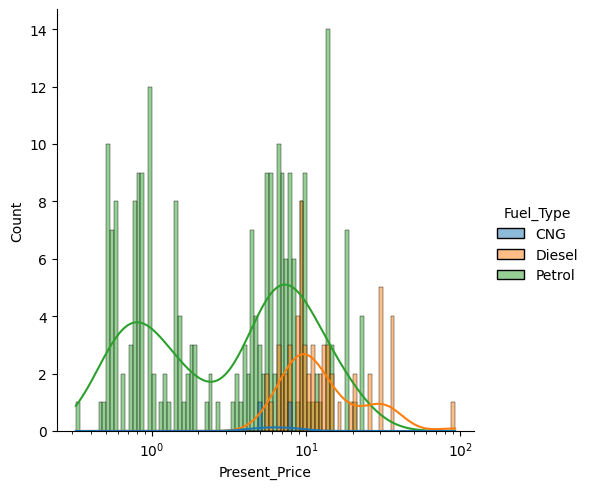

In [13]:
sns.displot(df, x='Present_Price', bins=100, hue='Fuel_Type', kde=True, log_scale=True)

На графике представлены распределения цен на автомобили (Present_Price) в зависимости от типа топлива (Fuel_Type): CNG (голубой цвет), Diesel (оранжевый цвет) и Petrol (зелёный цвет).

Petrol: Это топливо имеет самое широкое распределение цен, и его автомобили встречаются по всему диапазону, от низких до высоких цен. Количество автомобилей с бензиновыми двигателями особенно велико в диапазоне цен 1-10 млн (по логарифмической шкале).

Diesel: Автомобили на дизельном топливе чаще встречаются в среднем ценовом диапазоне. Их цены сосредоточены в районе 10 млн, но с меньшим количеством автомобилей по сравнению с бензином.

CNG: Это топливо имеет наименьшее количество автомобилей, и они представлены в нижней части ценового диапазона (около 1-10 млн.).

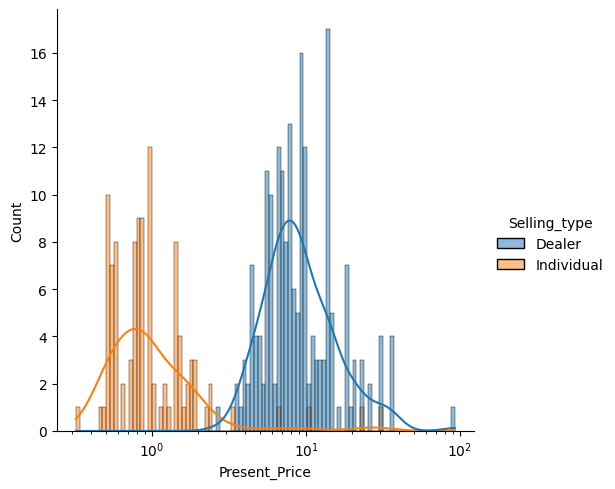

In [14]:
sns.displot(df, x='Present_Price', bins=100, hue='Selling_type', kde=True, log_scale=True)

На графике представлены распределения цен на автомобили (Present_Price) в зависимости от типа продавца (Selling_type): Dealer (синий цвет) и Individual (оранжевый цвет).

Dealer: Автомобили, продаваемые дилерами, охватывают широкий диапазон цен. Большая часть автомобилей находится в среднем ценовом сегменте (примерно от 2 до 50 млн). Наибольшая концентрация автомобилей у дилеров — в районе 10 млн.

Individual: Индивидуальные продавцы (частные лица) в основном продают автомобили в низком ценовом диапазоне. Частные лица реже продают автомобили по высоким ценам.

<Axes: >

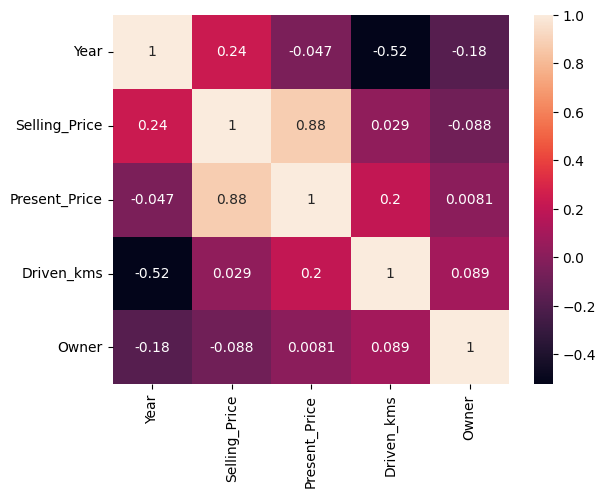

In [15]:
feature_correlation = df[num_features].corr()
sns.heatmap(feature_correlation, annot=True)

Selling_Price и Present_Price (0.88):
Самая высокая положительная корреляция. Это означает, что цена продажи автомобиля сильно зависит от его текущей цены. Чем выше текущая рыночная цена автомобиля, тем больше за него можно получить при продаже.

Year и Driven_kms (-0.52):
Сильная отрицательная корреляция. Это указывает на то, что более старые автомобили обычно имеют больше пройденных километров.

Year и Selling_Price (0.24):
Небольшая положительная корреляция, что говорит о том, что более новые автомобили имеют более высокие цены при старте продаж.

Present_Price и Driven_kms (0.2):
Умеренно положительная корреляция, что показывает, что автомобили с большим пробегом могут иметь более высокую текущую цену, но эта связь не слишком сильная.

Owner и Selling_Price (-0.088):
Практически отсутствует корреляция между количеством владельцев и ценой продажи.

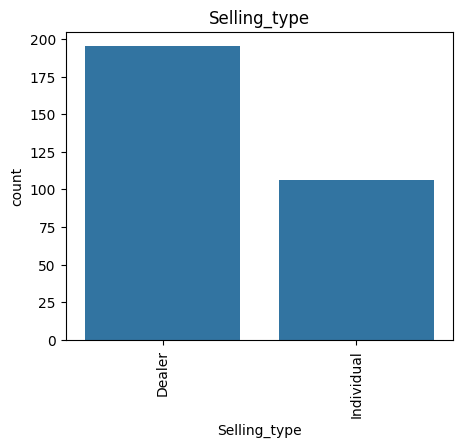

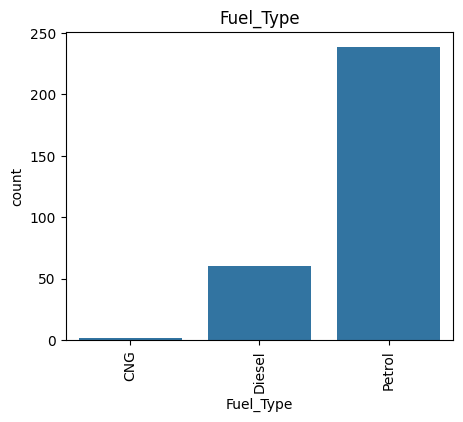

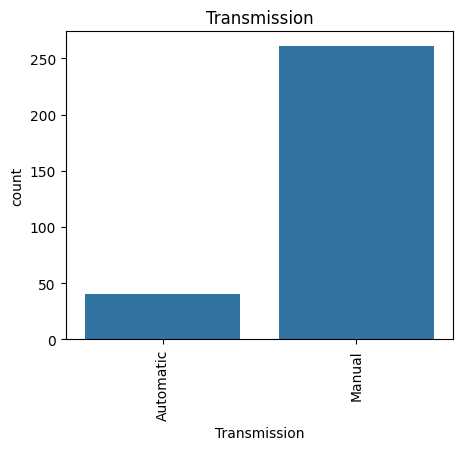

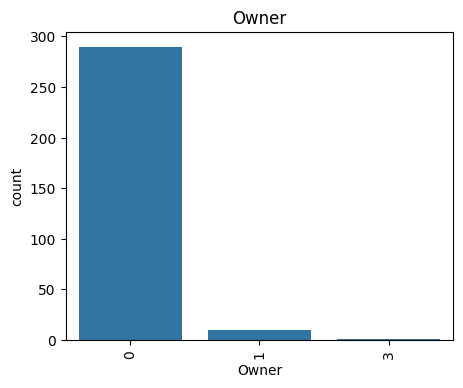

In [16]:
columns = ['Selling_type', 'Fuel_Type', 'Transmission', 'Owner']

for column in columns:
    plt.figure(figsize = (5,4))
    sns.countplot(x = column, data = df)
    plt.title(column)
    plt.xticks(rotation = 90)
    plt.show()

1. Количество автомобилей, проданных через дилеров, значительно превышает количество индивидуальных продаж.
2. Основная масса автомобилей использует бензин (Petrol), на втором месте — дизель (Diesel). Автомобили на сжиженном газе (CNG) встречаются крайне редко.
3. Автомобили с механической коробкой передач (Manual) значительно преобладают над автомобилями с автоматической коробкой передач (Automatic).
4. Большинство машин новые, не имели ни одного владельца.

In [17]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource,  HoverTool, Legend
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [18]:
source = ColumnDataSource(data=df.sample(frac=0.1))
p = figure(width=1000)
p.scatter(source=source, x='Year', y='Present_Price')

hover = HoverTool(tooltips=[('Selling_type', '@Selling_type'),
                              ('Owner', '@Owner'),
                              ('Fuel_Type', '@Fuel_Type')])

p.add_tools(hover)
show(p)

## Сохранение очищенного датасета

In [20]:
df.to_pickle('../data/CleanCarData.pkl')

In [22]:
df = pd.read_pickle('../data/CleanCarData.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Car_Name       301 non-null    category
 1   Year           301 non-null    int16   
 2   Selling_Price  301 non-null    float16 
 3   Present_Price  301 non-null    float16 
 4   Driven_kms     301 non-null    int32   
 5   Fuel_Type      301 non-null    category
 6   Selling_type   301 non-null    category
 7   Transmission   301 non-null    category
 8   Owner          301 non-null    int8    
dtypes: category(4), float16(2), int16(1), int32(1), int8(1)
memory usage: 5.4 KB
